# Importing Required Modules

## General Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import html

## NLP

In [4]:
import textacy.preprocessing as tprep
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ehern\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ehern\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ehern\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\ehern\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


True

# Functions

In [5]:
def rearrange_columns(df, dict = None):

    if dict is None:

        text = df["text"]
        sentiment = df["sentiment"]

    else:

        text = df[dict["text"]]
        sentiment = df[dict["sentiment"]]

    df = pd.concat([text, sentiment], axis=1)

    return df

In [6]:
def impurity_ratio(text, regex, min_len=10):
    """
    

    Parameters
    ----------
    text : str
        The text to be analysed.
    regex : regular expression.
        A regular expresion containing the characters considered impure.
    min_len : int, optional
        minimum length of the string to be analysed. The default is 10.

    Returns
    -------
    int
        Impurity ratio of the analysed text.

    """
    
    
    if len(text) < min_len:
        return 0
    else:
        return len(regex.findall(text))/len(text)

In [7]:
def clean_text(text):
    """
    

    Parameters
    ----------
    text : str
        Text that will be cleaned according to the rules explained in the comments.

    Returns
    -------
    str
        Returns the cleaned text.

    """
    
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)

    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)

    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)

    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)

    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)

    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)

    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)

    ###########
    # The ones between ########### were added after one cleaning process, consider removed them for other datasets

    # sequences of > at the begining or end of word

    text = re.sub(r'\s>+|^>+|<+\s|<+$', ' ', text)
    
    # sequences of # (more than 1) at the begining or end of word

    text = re.sub(r'\b#{2,}|#{2,}\b', ' ', text)

    # - at the end of beginning of word

    text = re.sub(r'\s-|-\s|-$', ' ', text)
    
    # sequences of # (one or more) at the begining of number between 0-20 as in #1

    text = re.sub(r'#(?=[0-9])', ' ', text)

    ###########

    return text.strip()

    

# Configuration

In [8]:
# Plotting theme
sns.set_theme(style="darkgrid")

# Cleaning and Normalising the Data - Pipeline

In [15]:
path = "Data/csv/fin_lab_large.csv"
df = pd.read_csv(path)
df = rearrange_columns(df)

In [16]:
df["text"] = (df["text"].apply(clean_text)       # cleans the text, see function in functions section
                        .apply(tprep.normalize.hyphenated_words)   # normalizes hyphendation
                        .apply(tprep.normalize.quotation_marks)    # normalizes fancy quotation marks to ASCII
                        .apply(tprep.normalize.unicode)            # normalizes unicode to ASCII
                        .apply(tprep.remove.accents)               # normalizes accents
                        .apply(tprep.replace.urls)                 # replaces urls by __URL__
                        .apply(tprep.replace.emails)               # replaces emails by __EMAIL__
                        .apply(tprep.replace.emojis)               # replaces emails by __EMOJI__
                    )

In [21]:
df.to_csv("Data/csv/fin_lab_large_cleaned.csv", index=False)

# Loading the Data

In [22]:
path = "Data/csv/fin_lab_large.csv"
df = pd.read_csv(path)
df = rearrange_columns(df)

# Data Exploration

## Basic Exploration

In [23]:
df.head()

,text,sentiment
0,Operating cash flow after investments totalled...,negative
1,"TietoEnator was down 1.13 pct to 18.38 , exten...",negative
2,In Finland 's Hobby Hall 's sales decreased by...,negative
3,"Svyturys-Utenos Alus , which is controlled by ...",positive
4,`` Lining stone sales were also good in the ea...,positive


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1945 non-null   object
 1   sentiment  1945 non-null   object
dtypes: object(2)
memory usage: 30.5+ KB


To simplify for the rest of the notebook calling the text and the sentiment columns we will create dedicated variables.

In [25]:
text_untouched_df = df["text"]
text_df = df["text"]
sentiment_df = df["sentiment"]

In [26]:
sentiment_count = sentiment_df.value_counts(dropna=False)


Bar Plot of the sentiment binary distribution.

<BarContainer object of 2 artists>

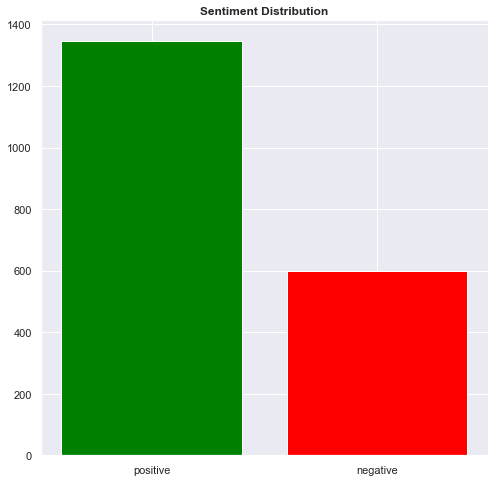

In [29]:
# create figure and axes
fig1, ax1 = plt.subplots(figsize = (8,8))

# set title
ax1.set_title('Sentiment Distribution', fontweight='bold')

# plot the bar chart
ax1.bar(sentiment_count.index, sentiment_count, color=('green','red'))

There are no missing values in the data and all are string.

In [30]:
text_n_nostr = text_df.shape[0] - sum([isinstance(i, str) for i in text_df])
sentiment_n_nostr = sentiment_df.shape[0] - sum([isinstance(i, str) for i in sentiment_df])

print(f"The number of values not string in column text is {text_n_nostr}.")
print(f"The number of missing values in sentiment column is {sentiment_n_nostr}.")

The number of values not string in column text is 0.
The number of missing values in sentiment column is 0.


## Exploring the length of the texts

Let us create a new column with the lenght of the text text.

In [31]:
df.insert(1, column="text_length", value=[len(text) for text in text_df])

In [32]:
df.head(10)

,text,text_length,sentiment
0,Operating cash flow after investments totalled...,120,negative
1,"TietoEnator was down 1.13 pct to 18.38 , exten...",120,negative
2,In Finland 's Hobby Hall 's sales decreased by...,92,negative
3,"Svyturys-Utenos Alus , which is controlled by ...",182,positive
4,`` Lining stone sales were also good in the ea...,110,positive
5,The company reported today an operating loss o...,112,negative
6,Stora Enso owns 43 percent of Bergvik and earn...,96,positive
7,The long-standing partnership and commitment e...,202,positive
8,The company 's annual loss amounted to EEK 18m...,94,negative
9,"Olvi , which controls a 94 percent stake in Ra...",260,positive


In [33]:
df["text"][9]

"Olvi , which controls a 94 percent stake in Ragutis through A. Le Coq , said in its annual report published earlier this year that the Lithuanian brewery 's sales reached 15.04 million euros last year , a rise of 20.4 percent from 12.49 million euros in 2004 ."

In [34]:
df.describe()

,text_length
count,1945.000000
mean,132.565039
std,55.485363
min,24.000000
25%,89.000000
50%,123.000000
75%,168.000000
max,298.000000


C:\Users\ehern\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'text Text Length Distribution'}, xlabel='text_length', ylabel='Density'>

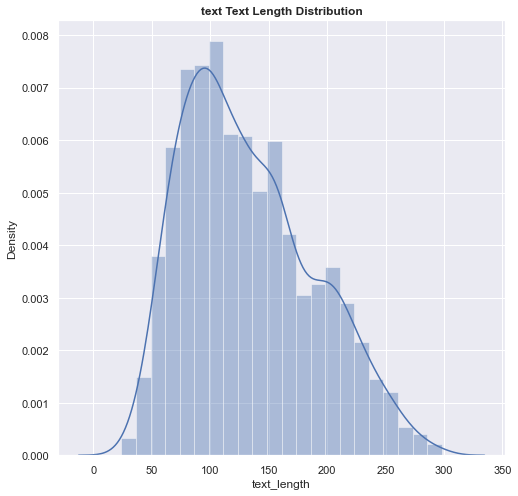

In [35]:
# create figure and axes
fig2, ax2 = plt.subplots(figsize = (8,8))

# set title
ax2.set_title('text Text Length Distribution', fontweight='bold')

# plot the bar chart
sns.distplot(df["text_length"])

C:\Users\ehern\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Boxplot - Length Distribution'}, xlabel='text_length'>

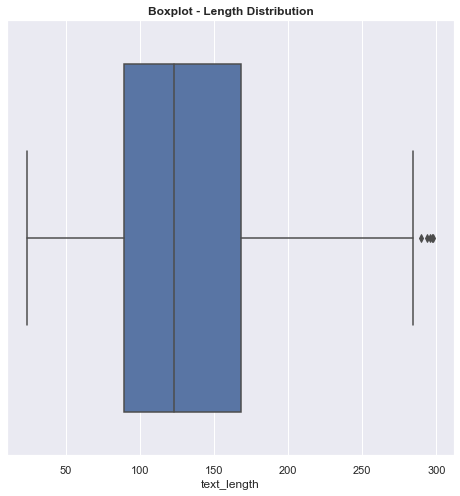

In [36]:
# create figure and axes
fig3, ax3 = plt.subplots(figsize = (8,8))

# set title
ax3.set_title('Boxplot - Length Distribution', fontweight='bold')

# plot the bar chart
sns.boxplot(df["text_length"])

## Exploring the level of impurity in the text

In [37]:
# characters considerd impure

RE_impure = re.compile(r'[#<>{}\[\]\\]')

In [38]:
# create a new columns with the text impurity

df.insert(2, column="impurity", value=[impurity_ratio(text, RE_impure) for text in text_df])

In [39]:
df.describe()

,text_length,impurity
count,1945.000000,1945.0
mean,132.565039,0.0
std,55.485363,0.0
min,24.000000,0.0
25%,89.000000,0.0
50%,123.000000,0.0
75%,168.000000,0.0
max,298.000000,0.0


In [40]:
# get the top 10 records in terms of impurity
impurity_sorted = df[["text", 'impurity']].sort_values(by='impurity', ascending=False).head(10)
impurity_sorted

,text,impurity
0,Operating cash flow after investments totalled...,0.0
1277,In February the Elcoteq group sold its St Pete...,0.0
1305,Net sales dropped by 6 % year-on-year to EUR 1...,0.0
1304,Finnish Suominen Flexible Packaging is cutting...,0.0
1303,stores 16 March 2010 - Finnish stationery and ...,0.0
1302,This is Done Logistics ' largest order in Norw...,0.0
1301,`` We are pleased to welcome Tapeks Noma into ...,0.0
1300,` Very recommendable ' is the Nokian Z G2 acco...,0.0
1299,Operating loss totaled EUR 0.3 mn compared to ...,0.0
1298,Finnish engineering and technology company Met...,0.0


In [41]:
impurity_sorted.iloc[0,0]

'Operating cash flow after investments totalled EUR 61.3 mn compared to EUR 75.3 mn in the corresponding period in 2007 .'

In [42]:
impurity_sorted.iloc[1,0]

'In February the Elcoteq group sold its St Petersburg facility ; according to unconfirmed information the reason could have been supply problems because of the Russian customs service .'

In [43]:
impurity_sorted.iloc[2,0]

'Net sales dropped by 6 % year-on-year to EUR 11.9 million .'

# Cleaning and Normalising the Text Data

## Cleaning the text

In [44]:
df.insert(3, column="text_cleaned", value=[clean_text(text) for text in text_df])


In [45]:
# create a new columns with the cleaned text impurity
df.insert(4, column="cleaned_impurity", value=[impurity_ratio(text, RE_impure) for text in df["text_cleaned"]])

In [46]:
# get the top 10 records in terms of impurity
df[['text_cleaned', 'cleaned_impurity']].sort_values(by='cleaned_impurity', ascending=False).head(10)

,text_cleaned,cleaned_impurity
0,Operating cash flow after investments totalled...,0.0
1277,In February the Elcoteq group sold its St Pete...,0.0
1305,Net sales dropped by 6 % year-on-year to EUR 1...,0.0
1304,Finnish Suominen Flexible Packaging is cutting...,0.0
1303,stores 16 March 2010 Finnish stationery and gi...,0.0
1302,This is Done Logistics ' largest order in Norw...,0.0
1301,`` We are pleased to welcome Tapeks Noma into ...,0.0
1300,` Very recommendable ' is the Nokian Z G2 acco...,0.0
1299,Operating loss totaled EUR 0.3 mn compared to ...,0.0
1298,Finnish engineering and technology company Met...,0.0


In [47]:
df = (df.drop(["text", "impurity", "text_length"], axis=1)
           .rename({"text_cleaned": "text", "cleaned_impurity": "impurity"}, axis=1)
           )
text_df = df["text"]
sentiment_df = df["sentiment"]
df.insert(1, column="text_length", value=[len(text) for text in text_df])
df.head()

,text,text_length,impurity,sentiment
0,Operating cash flow after investments totalled...,120,0.0,negative
1,"TietoEnator was down 1.13 pct to 18.38 , exten...",120,0.0,negative
2,In Finland 's Hobby Hall 's sales decreased by...,92,0.0,negative
3,"Svyturys-Utenos Alus , which is controlled by ...",182,0.0,positive
4,`` Lining stone sales were also good in the ea...,110,0.0,positive


In [48]:
df.describe()

,text_length,impurity
count,1945.000000,1945.0
mean,132.178920,0.0
std,55.054583,0.0
min,24.000000,0.0
25%,89.000000,0.0
50%,123.000000,0.0
75%,168.000000,0.0
max,298.000000,0.0


## Character Normalization

### Hyphendation

In [49]:
df["text_norm"] = df["text"].apply(tprep.normalize.hyphenated_words) # normalize hyphendation
                       

Let us see the changes

In [50]:
df["changed"] = [df["text"][i] != df["text_norm"][i] for i in range(df["text"].shape[0])] 
df["changed"].value_counts(dropna=False)

False    1945
Name: changed, dtype: int64

In [51]:
df["text"] = df["text_norm"]

### Fancy Quotation Marks

In [52]:
df["text_norm"] = df["text"].apply(tprep.normalize.quotation_marks) # normalize fancy quotation marks to ASCII

Let us see the changes

In [53]:
df["changed"] = [df["text"][i] != df["text_norm"][i] for i in range(df["text"].shape[0])] 
df["changed"].value_counts(dropna=False)

False    1797
True      148
Name: changed, dtype: int64

In [54]:
changed = df[df["changed"]]
changed = changed.reset_index(drop=True)

In [55]:
changed["text"][0]

'`` Lining stone sales were also good in the early autumn , and order books are strong to the end of the year .'

In [56]:
changed["text_norm"][0]

"'' Lining stone sales were also good in the early autumn , and order books are strong to the end of the year ."

In [57]:
df["text"] = df["text_norm"]

### Unicode

In [58]:
df["text_norm"] = df["text"].apply(tprep.normalize.unicode) # normalize unicode to ASCII

Let us see the changes

In [59]:
df["changed"] = [df["text"][i] != df["text_norm"][i] for i in range(df["text"].shape[0])] 
df["changed"].value_counts(dropna=False)

False    1945
Name: changed, dtype: int64

In [60]:
df["text"] = df["text_norm"]

### Removing the accents

In [61]:
df["text_norm"] = df["text"].apply(tprep.remove.accents) # remove accents as in ö

Let us see the changes

In [62]:
df["changed"] = [df["text"][i] != df["text_norm"][i] for i in range(df["text"].shape[0])] 
df["changed"].value_counts(dropna=False)

False    1941
True        4
Name: changed, dtype: int64

In [63]:
changed = df[df["changed"]]
changed = changed.reset_index(drop=True)
changed

,text,text_length,impurity,sentiment,text_norm,changed
0,"H+_kan Dahlstr+Â¦m , head of mobility services...",182,0.0,positive,"H+_kan Dahlstr+A¦m , head of mobility services...",True
1,Net profit fell by almost half to +Ã¢ 5.5 mill...,91,0.0,negative,Net profit fell by almost half to +A¢ 5.5 mill...,True
2,Finnish P+Â¦yry has been awarded an engineerin...,107,0.0,positive,Finnish P+A¦yry has been awarded an engineerin...,True
3,Finnish Rautaruukki has been awarded a contrac...,157,0.0,positive,Finnish Rautaruukki has been awarded a contrac...,True


In [64]:
changed["text"][0]

'H+_kan Dahlstr+Â¦m , head of mobility services at TeliaSonera , has forecast that mobile data volume on the TeliaSonera network in Sweden will rise eight-fold to 200,000 TB by 2014 .'

In [65]:
changed["text_norm"][0]

'H+_kan Dahlstr+A¦m , head of mobility services at TeliaSonera , has forecast that mobile data volume on the TeliaSonera network in Sweden will rise eight-fold to 200,000 TB by 2014 .'

In [66]:
df["text"] = df["text_norm"]

### Masking URLs

In [67]:
df["text_norm"] = df["text"].apply(tprep.replace.urls)  # replace URLs by _URL_

Let us see the changes

In [68]:
df["changed"] = [df["text"][i] != df["text_norm"][i] for i in range(df["text"].shape[0])] 
df["changed"].value_counts(dropna=False)

False    1945
Name: changed, dtype: int64

In [69]:
df["text"] = df["text_norm"]

### Masking Emojis

In [70]:
df["text_norm"] = df["text"].apply(tprep.replace.emojis)  # replace emojis by _EMOJI_

Let us see the changes

In [71]:
df["changed"] = [df["text"][i] != df["text_norm"][i] for i in range(df["text"].shape[0])] 
df["changed"].value_counts(dropna=False)

False    1945
Name: changed, dtype: int64

In [72]:
df[df["changed"]]

,text,text_length,impurity,sentiment,text_norm,changed


In [73]:
df["text"] = df["text_norm"]

### Masking Emails

In [74]:
df["text_norm"] = df["text"].apply(tprep.replace.emails)  # replace emails by _EMAIL_

Let us see the changes

In [75]:
df["changed"] = [df["text"][i] != df["text_norm"][i] for i in range(df["text"].shape[0])] 
df["changed"].value_counts(dropna=False)

False    1945
Name: changed, dtype: int64

In [76]:
df[df["changed"]]

,text,text_length,impurity,sentiment,text_norm,changed


In [77]:
df["text"] = df["text_norm"]

## Creating and storing the cleaned dataset

In [78]:
df = df.drop(["impurity", "text_length", "text_norm", "changed"], axis=1)
text_df = df["text"]
sentiment_df = df["sentiment"]
df.insert(1, column="text_length", value=[len(text) for text in text_df])
df.insert(2, column="impurity", value=[impurity_ratio(text, RE_impure) for text in text_df])
df.head()

,text,text_length,impurity,sentiment
0,Operating cash flow after investments totalled...,120,0.0,negative
1,"TietoEnator was down 1.13 pct to 18.38 , exten...",120,0.0,negative
2,In Finland 's Hobby Hall 's sales decreased by...,92,0.0,negative
3,"Svyturys-Utenos Alus , which is controlled by ...",182,0.0,positive
4,'' Lining stone sales were also good in the ea...,110,0.0,positive


In [79]:
df.describe()

,text_length,impurity
count,1945.000000,1945.0
mean,132.178920,0.0
std,55.054583,0.0
min,24.000000,0.0
25%,89.000000,0.0
50%,123.000000,0.0
75%,168.000000,0.0
max,298.000000,0.0
